# Name: Tuan Muhammad Aidiel bin Tuan Kamazon
# Group: 1
# Title: Satellite
# Role: Business Role
# Capstone 3

# 1. Introduction
As a business leader in this project, my objective is to leverage data-driven insights to better understand the key factors that impact satellite longevity and operational efficiency. By analyzing satellite attributes such as purpose, contractor country, launch vehicle, mass, and power consumption, we aim to identify trends and build predictive models that will enable us to optimize satellite performance and cost-effectiveness. This project will not only enhance our ability to forecast satellite lifespans but also support strategic decision-making for future investments, ultimately positioning our organization to lead in the rapidly evolving satellite market.

### 1.1. Objectives

**Analysis**

1) Averaged Expected Lifetime by Satellite Purpose

2) Top 10 Average Expected Lifetime of Satellites by Country of Contractor

3) Top 10 launch vehicles based on the average expected satellite lifetime

4) How the launch mass of a satellite correlates with its expected lifetime

5) Analyze the correlation between satellite power (watts) and its expected lifetime

6) Perform a financial analysis on how the investment in satellite mass or power correlates with the longevity of satellites.

**Machine Learning**

1) Built a Linear Regression Model that will predict the expected satellite lifetime based on power consumption

2) Built a Logistic Regression Model to predict whether a satellite will have an expected lifespan greater than 10 years based on power (watts)

3) Built K-Nearest Neighbors (KNN) to classify satellites into categories (e.g., "Low Power," "Medium Power," "High Power") based its purpose.

4) Built a Random Forest Classifier model that predicts the satellite's purpose based on its technical specifications such as mass, orbit, and power

5) Built K-Means Clustering to group satellites into clusters based on features like power consumption, mass, contractor, and expected lifespan to discover distinct types or categories of satellites.

### 1.2. Problem Statement

The satellite industry is faced with the challenge of optimizing satellite performance and longevity while balancing the substantial investments required for their design, launch, and operation. Despite the significant capital outlay, there is limited understanding of how various satellite attributes such as purpose, country of contractor, launch vehicle, mass, and power consumption affect their expected operational lifespan. This project seeks to address this gap by conducting a comprehensive analysis of these factors and developing predictive models to forecast satellite lifetimes based on technical specifications. By uncovering key insights and correlations, the project aims to provide a data-driven foundation for strategic decision-making, enabling better resource allocation, risk management, and maximized returns on investment in satellite development and deployment.

### 1.3. Dataset Description

1) Satellite: An artificial object placed into orbit around the Earth or other celestial bodies for communication, navigation, observation, or research purposes.
   
2) Purpose: The primary function or mission of the satellite, such as communication, earth observation, navigation, or scientific research.

3) Country of Contractor: The nation associated with the company or organization responsible for building or launching the satellite.

4) Launch Vehicle: The rocket or spacecraft used to transport and deploy the satellite into its designated orbit.

5) Mass: The total weight of the satellite, typically measured in kilograms, which affects its launch and operational parameters.

6) Power Consumption: The amount of electrical power, measured in watts, that the satellite requires to operate its systems and payloads effectively in space.

# 2. Data Loading and Exploration

### 2.1 Data Import: Loading the data using libraries like Pandas (read_csv or similar)

In [1]:
import numpy as np
import chardet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score, confusion_matrix
from scipy import stats

import requests
import plotly.express as px

In [2]:
def check_encoding(filename):
    with open(filename, 'rb') as f:
        result = chardet.detect(f.read())
    return result

In [3]:
def convert_utf8(inputfile, outputfile, result):
    if result['encoding'] != 'utf-8':
        with open(inputfile, 'r', encoding=result['encoding']) as f:
            content = f.read()
        with open(outputfile, 'w', encoding='utf-8') as f:
            f.write(content)

In [4]:
# Loading the data using Pandas read_csv

inputfilename = "UCS-Satellite-Database-Officialname-1-1-2023.csv"
outputfilename = "UCS-Satellite-Database-Officialname-1-1-2023.csv-utf8.csv"
inputfileencoding = check_encoding(inputfilename)
convert_utf8(inputfilename, outputfilename, inputfileencoding)
satellite = pd.read_csv(outputfilename)

### 2.2  Data Overview: Displaying the first few rows of the dataset (head or tail or info or similar) to understand its structure

In [5]:
satellite

,Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,Non-Polar Inclined,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,NaN,LEO,Sun-Synchronous,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAt-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,-75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,Ziyuan 1-2D,NR,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Hyperspectral Imaging,LEO,Sun-Synchronous,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6714,Ziyuan 3,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6715,Ziyuan 3-2,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6716,Ziyuan 3-3,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# convert Launch Mass (kg.) column into numerical data

satellite['Launch Mass (kg.)'] = satellite['Launch Mass (kg.)'].str.replace(',', '').astype(float)
satellite['Launch Mass (kg.)'].head(), satellite['Launch Mass (kg.)'].dtype

(0      22.0
 1       5.0
 2       1.0
 3    6330.0
 4    1800.0
 Name: Launch Mass (kg.), dtype: float64,
 dtype('float64'))

In [7]:
satellite.describe()

# the only columns in the dataset with numerical data 

,Longitude of GEO (degrees),Eccentricity,Launch Mass (kg.),Expected Lifetime (yrs.),NORAD Number
count,6716.000000,6718.000000,6475.000000,4804.000000,6718.000000
mean,1.844772,0.391619,665.891120,5.510148,46818.601518
std,27.608673,14.122881,1455.149264,3.592762,6281.113629
min,-179.800000,-0.033400,1.000000,0.250000,7530.000000
25%,0.000000,0.000202,148.000000,4.000000,44068.000000
50%,0.000000,0.000329,260.000000,4.000000,47806.500000
75%,0.000000,0.000943,260.000000,5.000000,51975.750000
max,359.000000,575.000000,22500.000000,30.000000,62684.000000


In [8]:
satellite.head(5)

,Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,Non-Polar Inclined,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,NaN,LEO,Sun-Synchronous,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAt-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,-75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
satellite.tail(5)

,Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
6713,Ziyuan 1-2D,NR,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Hyperspectral Imaging,LEO,Sun-Synchronous,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6714,Ziyuan 3,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6715,Ziyuan 3-2,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6716,Ziyuan 3-3,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6717,Z-Sat,NR (1/22),Japan,Mitsubishi Heavy Industries,Commercial,Technology Development,NaN,LEO,Sun-Synchronous,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
satellite.columns

Index(['Current Official Name of Satellite', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', ' Dry Mass (kg.) ', 'Power (watts)',
       'Date of Launch', 'Expected Lifetime (yrs.)', 'Contractor',
       'Country of Contractor', 'Launch Site', 'Launch Vehicle',
       'COSPAR Number', 'NORAD Number', 'Comments', 'Unnamed: 27',
       'Source Used for Orbital Data', 'Source', 'Source.1', 'Source.2',
       'Source.3', 'Source.4', 'Source.5', 'Source.6', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed

In [11]:
satellite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 67 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Current Official Name of Satellite  6718 non-null   object 
 1   Country/Org of UN Registry          6718 non-null   object 
 2   Country of Operator/Owner           6718 non-null   object 
 3   Operator/Owner                      6718 non-null   object 
 4   Users                               6718 non-null   object 
 5   Purpose                             6718 non-null   object 
 6   Detailed Purpose                    1167 non-null   object 
 7   Class of Orbit                      6718 non-null   object 
 8   Type of Orbit                       6077 non-null   object 
 9   Longitude of GEO (degrees)          6716 non-null   float64
 10  Perigee (km)                        6718 non-null   object 
 11  Apogee (km)                         6718 no

# 3. Data Cleaning and Preprocessing 

### 3.1 Missing Values: Identifying missing or null values in the dataset. 

In [12]:
# removing unnecessary columns whose names start with "Unnamed: ", "Source.", "Source", or "Comments"

satellite.drop(satellite.columns[satellite.columns.str.startswith('Unnamed: ')], axis=1, inplace=True)
satellite.drop(satellite.columns[satellite.columns.str.startswith('Source.')], axis=1, inplace=True)
satellite.drop(satellite.columns[satellite.columns.str.startswith('Source')], axis=1, inplace=True)
satellite.drop(satellite.columns[satellite.columns.str.startswith('Comments')], axis=1, inplace=True)
satellite

,Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Dry Mass (kg.),Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number
0,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,Non-Polar Inclined,0.0,...,NaN,NaN,11-12-2019,0.5,Hera Systems,USA,Satish Dhawan Space Centre,PSLV,2019-089H,44859
1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,NaN,LEO,Sun-Synchronous,0.0,...,NaN,4.50,23-06-2017,2.0,Aalto University,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775
2,AAt-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,...,NaN,NaN,25-04-2016,NaN,University of Aalborg,Denmark,Guiana Space Center,Soyuz-2.1a,2016-025E,41460
3,ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.0,...,NaN,"16,000.00",06-02-2014,15.0,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508
4,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,-75.0,...,NaN,NaN,15-06-2016,15.0,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,Ziyuan 1-2D,NR,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Hyperspectral Imaging,LEO,Sun-Synchronous,0.0,...,NaN,NaN,14-09-2019,5.0,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2019-059A,44528
6714,Ziyuan 3,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0.0,...,NaN,NaN,09-01-2012,4.0,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2012-001A,38046
6715,Ziyuan 3-2,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0.0,...,NaN,NaN,29-05-2016,4.0,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2016-033A,41556
6716,Ziyuan 3-3,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0.0,...,NaN,NaN,25-07-2020,NaN,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2020-051A,45939


In [13]:
#  a concise summary of the DataFrame

satellite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Current Official Name of Satellite  6718 non-null   object 
 1   Country/Org of UN Registry          6718 non-null   object 
 2   Country of Operator/Owner           6718 non-null   object 
 3   Operator/Owner                      6718 non-null   object 
 4   Users                               6718 non-null   object 
 5   Purpose                             6718 non-null   object 
 6   Detailed Purpose                    1167 non-null   object 
 7   Class of Orbit                      6718 non-null   object 
 8   Type of Orbit                       6077 non-null   object 
 9   Longitude of GEO (degrees)          6716 non-null   float64
 10  Perigee (km)                        6718 non-null   object 
 11  Apogee (km)                         6718 no

In [14]:
# List all columns that have NaN values

nan_columns = satellite.columns[satellite.isnull().any()].tolist()
nan_columns

['Detailed Purpose',
 'Type of Orbit',
 'Longitude of GEO (degrees)',
 'Period (minutes)',
 'Launch Mass (kg.)',
 ' Dry Mass (kg.) ',
 'Power (watts)',
 'Expected Lifetime (yrs.)']

In [15]:
# columns with missing values

missing_values = satellite.isnull().sum()
missing_values[missing_values > 0]

Detailed Purpose              5551
Type of Orbit                  641
Longitude of GEO (degrees)       2
Period (minutes)                44
Launch Mass (kg.)              243
 Dry Mass (kg.)               6274
Power (watts)                 6137
Expected Lifetime (yrs.)      1914
dtype: int64

In [16]:
# Show percentage of missing values for each column

missing_percentage = satellite.isnull().mean() * 100
missing_percentage

Current Official Name of Satellite     0.000000
Country/Org of UN Registry             0.000000
Country of Operator/Owner              0.000000
Operator/Owner                         0.000000
Users                                  0.000000
Purpose                                0.000000
Detailed Purpose                      82.628759
Class of Orbit                         0.000000
Type of Orbit                          9.541530
Longitude of GEO (degrees)             0.029771
Perigee (km)                           0.000000
Apogee (km)                            0.000000
Eccentricity                           0.000000
Inclination (degrees)                  0.000000
Period (minutes)                       0.654957
Launch Mass (kg.)                      3.617148
 Dry Mass (kg.)                       93.390890
Power (watts)                         91.351593
Date of Launch                         0.000000
Expected Lifetime (yrs.)              28.490622
Contractor                             0

In [17]:
# Identify rows with missing values

rows_with_missing = satellite[satellite.isnull().any(axis=1)]
rows_with_missing

,Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Dry Mass (kg.),Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number
0,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,Non-Polar Inclined,0.0,...,NaN,NaN,11-12-2019,0.5,Hera Systems,USA,Satish Dhawan Space Centre,PSLV,2019-089H,44859
1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,NaN,LEO,Sun-Synchronous,0.0,...,NaN,4.50,23-06-2017,2.0,Aalto University,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775
2,AAt-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,...,NaN,NaN,25-04-2016,NaN,University of Aalborg,Denmark,Guiana Space Center,Soyuz-2.1a,2016-025E,41460
3,ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.0,...,NaN,"16,000.00",06-02-2014,15.0,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508
4,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,-75.0,...,NaN,NaN,15-06-2016,15.0,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,Ziyuan 1-2D,NR,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Hyperspectral Imaging,LEO,Sun-Synchronous,0.0,...,NaN,NaN,14-09-2019,5.0,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2019-059A,44528
6714,Ziyuan 3,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0.0,...,NaN,NaN,09-01-2012,4.0,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2012-001A,38046
6715,Ziyuan 3-2,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0.0,...,NaN,NaN,29-05-2016,4.0,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2016-033A,41556
6716,Ziyuan 3-3,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0.0,...,NaN,NaN,25-07-2020,NaN,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2020-051A,45939


In [18]:
# Count total missing values in the entire dataset
total_missing_values = satellite.isnull().sum().sum()
total_missing_values

20806

### 3.2 Handling Missing Data: Filling, dropping, or imputing missing values

In [19]:
# 1. Drop rows with any missing values
satellite_dropped_rows = satellite.dropna()
satellite_dropped_rows

,Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Dry Mass (kg.),Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number
43,AIM,USA,USA,"Center for Atmospheric Sciences, Hampton Unive...",Government,Earth Observation,Earth Science,LEO,Sun-Synchronous,0.0,...,197,216.00,25-04-2007,2.0,Orbital Sciences Corp.,USA,Vandenberg AFB,Pegasus XL,2007-015A,31304
219,BeijinGalaxy-1,China,China,Beijing Landview Mapping Information Technolog...,Commercial,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0.0,...,155,50.00,27-10-2005,7.0,Tsinghua University/University of Surrey,China/UK,Plesetsk Cosmodrome,Kosmos 3M,2005-043A,28890
221,Bispectral InfraRed Detector 2 (Bird 2),Germany,Germany,Institute of Space Sensor Technology and Plane...,Government/Civil,Earth Observation/Technology Development,Optical Imaging,LEO,Sun-Synchronous,0.0,...,77,120.00,22-10-2001,1.5,Deutsches Zentrum für Luft- und Raumfahrt,Germany,Satish Dhawan Space Centre,PSLV C3,2001-049C,26959
224,BKA 2,Belarus,Belarus,National Academy of Sciences,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0.0,...,110,300.00,22-07-2012,5.0,NPO VNIIEM,Russia,Baikonur Cosmodrome,Soyuz-Fregat,2012-039B,38708
279,CartoSat 1,India,India,Indian Space Research Organization (ISRO),Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0.0,...,"1,450","1,100.00",05-05-2005,6.0,Indian Space Research Organization (ISRO),India,Satish Dhawan Space Centre,PSLV C6,2005-017A,28649
423,USA 131,USA,USA,DoD/NOAA,Military,Earth Observation,Earth Science/Meterology,LEO,Sun-Synchronous,0.0,...,823,900.00,04-04-1997,5.0,Lockheed Martin Missiles & Space,USA,Vandenberg AFB,Titan 2,1997-012A,24753
424,USA 147,USA,USA,DoD/NOAA,Military,Earth Observation,Earth Science/Meterology,LEO,Sun-Synchronous,0.0,...,823,900.00,12-12-1999,5.0,Lockheed Martin Missiles & Space,USA,Vandenberg AFB,Titan 2,1999-067A,25991
425,USA 172,USA,USA,DoD/NOAA,Military,Earth Observation,Earth Science/Meterology,LEO,Sun-Synchronous,0.0,...,825,900.00,18-10-2003,5.0,Lockheed Martin Missiles & Space,USA,Vandenberg AFB,Titan 2,2003-048A,28054
426,USA 173,USA,USA,DoD/NOAA,Military,Earth Observation,Earth Science/Meterology,LEO,Sun-Synchronous,0.0,...,825,900.00,04-11-2006,5.0,Lockheed Martin Missiles & Space,USA,Vandenberg AFB,Delta 4,2006-050A,29522
427,USA 210,USA,USA,DoD/NOAA,Military,Earth Observation,Earth Science/Meterology,LEO,Sun-Synchronous,0.0,...,825,900.00,18-10-2009,5.0,Lockheed Martin Missiles & Space,USA,Vandenberg AFB,Atlas 5,2009-057A,35951


In [20]:
# 2. Drop columns with more than 50% missing values
satellite_dropped_columns = satellite.dropna(thresh=len(satellite) * 0.5, axis=1)
satellite_dropped_columns

,Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),...,Period (minutes),Launch Mass (kg.),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number
0,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,LEO,Non-Polar Inclined,0.0,566,...,96.08,22.0,11-12-2019,0.5,Hera Systems,USA,Satish Dhawan Space Centre,PSLV,2019-089H,44859
1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,LEO,Sun-Synchronous,0.0,497,...,94.7,5.0,23-06-2017,2.0,Aalto University,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775
2,AAt-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,LEO,Sun-Synchronous,0.0,442,...,95.9,1.0,25-04-2016,NaN,University of Aalborg,Denmark,Guiana Space Center,Soyuz-2.1a,2016-025E,41460
3,ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,NaN,75.0,"35,778",...,1436.03,6330.0,06-02-2014,15.0,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508
4,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,NaN,-75.0,"35,700",...,1436.1,1800.0,15-06-2016,15.0,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,Ziyuan 1-2D,NR,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,LEO,Sun-Synchronous,0.0,748,...,99.8,2650.0,14-09-2019,5.0,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2019-059A,44528
6714,Ziyuan 3,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,LEO,Sun-Synchronous,0.0,500,...,94.7,2650.0,09-01-2012,4.0,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2012-001A,38046
6715,Ziyuan 3-2,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,LEO,Sun-Synchronous,0.0,487,...,94.49,2630.0,29-05-2016,4.0,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2016-033A,41556
6716,Ziyuan 3-3,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,LEO,Sun-Synchronous,0.0,487,...,94.5,2630.0,25-07-2020,NaN,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2020-051A,45939


In [21]:
# 3. Fill missing values in a column with the mean (for numeric columns)

# Calculate the mean of the 'Expected Lifetime (yrs.)' column, excluding any NaNs
lifetime_mean = satellite['Expected Lifetime (yrs.)'].mean()

# Now fill the NaN values with this computed mean and assign it back to the DataFrame column
satellite['Expected Lifetime (yrs.)'] = satellite['Expected Lifetime (yrs.)'].fillna(lifetime_mean)

# Optionally, you can print out the result to verify
satellite[['Expected Lifetime (yrs.)']]

# This code snippet is designed to handle missing values in the 'Expected Lifetime (yrs.)' column of the satellite DataFrame 
# by replacing them with the mean of the existing values in that column. 
# By applying fillna() with the mean, it ensures that all NaN values are substituted, 
# thus preserving the dataset's integrity for analysis without losing rows due to missing data

,Expected Lifetime (yrs.)
0,0.500000
1,2.000000
2,5.510148
3,15.000000
4,15.000000
...,...
6713,5.000000
6714,4.000000
6715,4.000000
6716,5.510148


In [22]:
# Fill NaNs with the mean for 'Dry Mass (kg.)' and 'Power (watts)'

# Convert 'Dry Mass (kg.)' and 'Power (watts)' to numeric, coercing any errors to NaN
satellite[' Dry Mass (kg.) '] = pd.to_numeric(satellite[' Dry Mass (kg.) '], errors='coerce')
satellite['Power (watts)'] = pd.to_numeric(satellite['Power (watts)'], errors='coerce')

# Fill the NaN values with the mean of the columns and reassign to the original DataFrame columns
satellite[' Dry Mass (kg.) '] = satellite[' Dry Mass (kg.) '].fillna(satellite[' Dry Mass (kg.) '].mean())
satellite['Power (watts)'] = satellite['Power (watts)'].fillna(satellite['Power (watts)'].mean())

# Check for remaining NaNs
print(satellite[[' Dry Mass (kg.) ', 'Power (watts)']].isnull().sum())


 Dry Mass (kg.)     0
Power (watts)       0
dtype: int64


In [23]:
# 4. Fill missing values in a categorical column with a placeholder ('Unknown')
satellite['Detailed Purpose'] = satellite['Detailed Purpose'].fillna('Unknown')
satellite[['Detailed Purpose']]

,Detailed Purpose
0,Infrared Imaging
1,Unknown
2,Automatic Identification System (AIS)
3,Unknown
4,Unknown
...,...
6713,Hyperspectral Imaging
6714,Optical Imaging
6715,Optical Imaging
6716,Optical Imaging


In [24]:
# List all columns that have NaN values
nan_columns = satellite.columns[satellite.isnull().any()].tolist()
nan_columns

['Type of Orbit',
 'Longitude of GEO (degrees)',
 'Period (minutes)',
 'Launch Mass (kg.)']

In [25]:
# 5. Forward fill missing values (propagate last valid value forward)

satellite.ffill(inplace=True)
print("NaN counts per column after ffill:")
satellite.isnull().sum()

# fills each NaN value in the DataFrame with the last valid (non-NaN) value encountered in the column, 
# continuing forward until a new valid value is found, effectively carrying forward the last known value to fill gaps

NaN counts per column after ffill:


Current Official Name of Satellite    0
Country/Org of UN Registry            0
Country of Operator/Owner             0
Operator/Owner                        0
Users                                 0
Purpose                               0
Detailed Purpose                      0
Class of Orbit                        0
Type of Orbit                         0
Longitude of GEO (degrees)            0
Perigee (km)                          0
Apogee (km)                           0
Eccentricity                          0
Inclination (degrees)                 0
Period (minutes)                      0
Launch Mass (kg.)                     0
 Dry Mass (kg.)                       0
Power (watts)                         0
Date of Launch                        0
Expected Lifetime (yrs.)              0
Contractor                            0
Country of Contractor                 0
Launch Site                           0
Launch Vehicle                        0
COSPAR Number                         0


In [26]:
# List all columns that have NaN values
nan_columns = satellite.columns[satellite.isnull().any()].tolist()
nan_columns

[]

In [27]:
satellite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Current Official Name of Satellite  6718 non-null   object 
 1   Country/Org of UN Registry          6718 non-null   object 
 2   Country of Operator/Owner           6718 non-null   object 
 3   Operator/Owner                      6718 non-null   object 
 4   Users                               6718 non-null   object 
 5   Purpose                             6718 non-null   object 
 6   Detailed Purpose                    6718 non-null   object 
 7   Class of Orbit                      6718 non-null   object 
 8   Type of Orbit                       6718 non-null   object 
 9   Longitude of GEO (degrees)          6718 non-null   float64
 10  Perigee (km)                        6718 non-null   object 
 11  Apogee (km)                         6718 no

### 3.3 Data Transformation: Normalization, scaling, or transforming features.

In [28]:
# 1. Standardize numeric data (mean = 0, std = 1)

# Clean the 'Launch Mass (kg.)' column: remove commas and convert to numeric
satellite['Launch Mass (kg.)'] = satellite['Launch Mass (kg.)'].replace(',', '', regex=True)
satellite['Launch Mass (kg.)'] = pd.to_numeric(satellite['Launch Mass (kg.)'], errors='coerce')

scaler = StandardScaler()
satellite['Normalized Mass'] = scaler.fit_transform(satellite[['Launch Mass (kg.)']])

satellite[['Normalized Mass']]

# negative values in the Normalized Mass column simply indicate that 
# those values are below the mean of the original mass values

,Normalized Mass
0,-0.451143
1,-0.462731
2,-0.465458
3,3.848976
4,0.760907
...,...
6713,1.340346
6714,1.340346
6715,1.326712
6716,1.326712


In [29]:
# 2. Normalize data to a range (e.g., 0 to 1) using MinMaxScaler

# Clean the 'Period (minutes)' column: remove commas and extra spaces, then convert to numeric
satellite['Period (minutes)'] = satellite['Period (minutes)'].replace(',', '', regex=True)
satellite['Period (minutes)'] = satellite['Period (minutes)'].str.strip()  # Remove leading/trailing spaces
satellite['Period (minutes)'] = pd.to_numeric(satellite['Period (minutes)'], errors='coerce')

min_max_scaler = MinMaxScaler()
satellite['Scaled Period'] = min_max_scaler.fit_transform(satellite[['Period (minutes)']])

satellite[['Scaled Period']]

# scales the values in the 'Period (minutes)' column to a range between 0 and 1, resulting in the new 'Scaled Period' column, 
# with each value rescaled based on the minimum and maximum values of the original data.

,Scaled Period
0,0.007565
1,0.007445
2,0.007549
3,0.123971
4,0.123977
...,...
6713,0.007888
6714,0.007445
6715,0.007427
6716,0.007428


### 3.4 Encoding Categorical Variables: Converting categorical variables into numerical formats. 

In [30]:
# 1. Convert categorical values to numerical using Label Encoding

label_encoder = LabelEncoder()
satellite['Class of Orbit Encoded'] = label_encoder.fit_transform(satellite['Class of Orbit'])
satellite[['Class of Orbit Encoded']]

# Each unique class of orbit is assigned a numerical label (e.g., 2, 1), enabling the data to 
# be used in machine learning models that require numeric input.

,Class of Orbit Encoded
0,2
1,2
2,2
3,1
4,1
...,...
6713,2
6714,2
6715,2
6716,2


In [31]:
# 2. Map categorical values to numerical ones manually (e.g., binary encoding)

satellite['Orbit_Type_Num'] = satellite['Type of Orbit'].map({'LEO': 1, 'GEO': 2, 'MEO': 3, 'HEO': 4, 'Unknown': 0})
satellite[['Orbit_Type_Num']]

# the mapping function failed, likely because the values in the 'Type of Orbit' column 
# did not match the keys specified in the mapping dictionary

,Orbit_Type_Num
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6713,NaN
6714,NaN
6715,NaN
6716,NaN


### 3.5 Outliers Detection and Treatment: Identifying and dealing with outliers in the data.

In [32]:
# 1. Identify outliers using the IQR method
Q1 = satellite['Launch Mass (kg.)'].quantile(0.25)
Q1

148.0

In [33]:
Q3 = satellite['Launch Mass (kg.)'].quantile(0.75)
Q3

260.0

In [34]:
IQR = Q3 - Q1
outliers = satellite[(satellite['Launch Mass (kg.)'] < (Q1 - 1.5 * IQR)) | (satellite['Launch Mass (kg.)'] > (Q3 + 1.5 * IQR))]
outliers

# The Launch Mass (kg.) was used in the outlier detection process because it is a numeric feature that can have extreme values, 
# which might significantly deviate from the majority of the data.

,Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Normalized Mass,Scaled Period,Class of Orbit Encoded,Orbit_Type_Num
3,ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,Unknown,GEO,Sun-Synchronous,75.0,...,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508,3.848976,0.123971,1,NaN
4,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,Unknown,GEO,Sun-Synchronous,-75.0,...,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588,0.760907,0.123977,1,NaN
5,ABS-3A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,Unknown,GEO,Sun-Synchronous,-3.0,...,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2015-010A,40424,0.897246,0.123968,1,NaN
6,ABS-4,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,Unknown,GEO,Sun-Synchronous,75.0,...,Space Systems/Loral,USA,Cape Canaveral,Atlas 3,2004-007A,28184,2.358114,0.123977,1,NaN
7,ABS-6,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,Unknown,GEO,Sun-Synchronous,159.0,...,Lockheed Martin,USA,Baikonur Cosmodrome,Proton,1999-053A,25924,1.506679,0.123975,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,Ziyuan 1-02C,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0.0,...,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2011-079A,38038,0.556399,0.007923,2,NaN
6713,Ziyuan 1-2D,NR,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Hyperspectral Imaging,LEO,Sun-Synchronous,0.0,...,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2019-059A,44528,1.340346,0.007888,2,NaN
6714,Ziyuan 3,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0.0,...,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2012-001A,38046,1.340346,0.007445,2,NaN
6715,Ziyuan 3-2,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0.0,...,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2016-033A,41556,1.326712,0.007427,2,NaN


In [35]:
# 2. Remove outliers using the IQR method
satellite_no_outliers = satellite[~((satellite['Launch Mass (kg.)'] < (Q1 - 1.5 * IQR)) | (satellite['Launch Mass (kg.)'] > (Q3 + 1.5 * IQR)))]
satellite_no_outliers

,Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Normalized Mass,Scaled Period,Class of Orbit Encoded,Orbit_Type_Num
0,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,Non-Polar Inclined,0.0,...,Hera Systems,USA,Satish Dhawan Space Centre,PSLV,2019-089H,44859,-0.451143,0.007565,2,NaN
1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,Unknown,LEO,Sun-Synchronous,0.0,...,Aalto University,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775,-0.462731,0.007445,2,NaN
2,AAt-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,...,University of Aalborg,Denmark,Guiana Space Center,Soyuz-2.1a,2016-025E,41460,-0.465458,0.007549,2,NaN
8,Adelis-Sampson 1,NR,Israel,Asher Space Research Institute at Technion/Isr...,Government,Technology Development,Unknown,LEO,Sun-Synchronous,0.0,...,Asher Space Research Institute at Technion/Isr...,Israel,Baikonur Cosmodrome,Soyuz-2.1a,2021-022F,47937,-0.460005,0.007515,2,NaN
9,Adelis-Sampson 2,NR,Israel,Asher Space Research Institute at Technion/Isr...,Government,Technology Development,Unknown,LEO,Sun-Synchronous,0.0,...,Asher Space Research Institute at Technion/Isr...,Israel,Baikonur Cosmodrome,Soyuz-2.1a,2021-022H,47939,-0.460005,0.007515,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6708,OHS-1,China,China,Zhuhai Orbita Aerospace Science and Technology...,Commercial,Earth Observation,Hyperspectral Imaging,LEO,Sun-Synchronous,0.0,...,Zhuhai Orbita Aerospace Science and Technology...,China,Jiuquan Satellite Launch Center,Long March 11,2018-040A,43439,-0.404787,0.007436,2,NaN
6709,OHS-2,China,China,Zhuhai Orbita Aerospace Science and Technology...,Commercial,Earth Observation,Hyperspectral Imaging,LEO,Sun-Synchronous,0.0,...,Zhuhai Orbita Aerospace Science and Technology...,China,Jiuquan Satellite Launch Center,Long March 11,2018-040C,43441,-0.404787,0.007436,2,NaN
6710,OHS-3,China,China,Zhuhai Orbita Aerospace Science and Technology...,Commercial,Earth Observation,Hyperspectral Imaging,LEO,Sun-Synchronous,0.0,...,Zhuhai Orbita Aerospace Science and Technology...,China,Jiuquan Satellite Launch Center,Long March 11,2018-040D,43442,-0.404787,0.007436,2,NaN
6711,OHS-4,China,China,Zhuhai Orbita Aerospace Science and Technology...,Commercial,Earth Observation,Hyperspectral Imaging,LEO,Sun-Synchronous,0.0,...,Zhuhai Orbita Aerospace Science and Technology...,China,Jiuquan Satellite Launch Center,Long March 11,2018-040E,43443,-0.404787,0.007436,2,NaN


In [36]:
# 3. Detect outliers using Z-scores
satellite['Mass Z-Score'] = np.abs(stats.zscore(satellite['Launch Mass (kg.)']))
outliers_zscore = satellite[satellite['Mass Z-Score'] > 3]
outliers_zscore

,Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Normalized Mass,Scaled Period,Class of Orbit Encoded,Orbit_Type_Num,Mass Z-Score
3,ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,Unknown,GEO,Sun-Synchronous,75.00,...,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508,3.848976,0.123971,1,NaN,3.848976
11,USA 311,USA,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,Sun-Synchronous,0.00,...,USA,Cape Canaveral,Delta 4 Heavy,2020-095A,47237,3.215001,0.124107,1,NaN,3.215001
12,USA 139,USA,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,Sun-Synchronous,-26.00,...,USA,Cape Canaveral,Titan IVA,1998-029A,25336,3.078663,0.123981,1,NaN,3.078663
13,USA 171,USA,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,Sun-Synchronous,68.00,...,USA,Cape Canaveral,Titan IV,2003-041A,27937,3.078663,0.123977,1,NaN,3.078663
14,USA 202,USA,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,Sun-Synchronous,44.00,...,USA,Cape Canaveral,Delta 4 Heavy,2009-001A,33490,3.215001,0.124212,1,NaN,3.215001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6693,Zhongxing 2D,NR,China,China Satellite Communication Corp. (China Sat...,Government/Commercial,Communications,Unknown,GEO,Sun-Synchronous,130.00,...,China,Xichang Satellite Launch Center,Long March 3B,2019-001A,43920,3.078663,0.123979,1,NaN,3.078663
6694,Zhongxing 2E,NR (9/21),China,China Satellite Communication Corp. (China Sat...,Government/Commercial,Communications,Unknown,GEO,Sun-Synchronous,0.00,...,China,Xichang Satellite Launch Center,Long March 3B,2021-071A,49062,3.078663,0.123978,1,NaN,3.078663
6697,Zhongxing 6D,NR (4/22),China,China Satellite Communication Corp. (China Sat...,Government/Commercial,Communications,Unknown,GEO,Sun-Synchronous,125.00,...,China,Xichang Satellite Launch Center,Long March 3B,2022-038A,52255,3.112747,0.123977,1,NaN,3.112747
6698,Zhongxing 9,China,China,China Satellite Communication Corp. (China Sat...,Government,Communications,Unknown,GEO,Sun-Synchronous,92.22,...,France,Xichang Satellite Launch Center,Long March 3B,2008-028A,33051,3.112747,0.123977,1,NaN,3.112747


In [37]:
# 4. Replace outliers with the median
satellite['Mass No Outliers'] = satellite['Launch Mass (kg.)'].apply(lambda x: satellite['Launch Mass (kg.)'].median() if x > (Q3 + 1.5 * IQR) or x < (Q1 - 1.5 * IQR) else x)
satellite[['Mass No Outliers']]

# checks if a value is greater than the upper bound or smaller than the lower bound (calculated using the Interquartile Range, IQR), 
# and if it is, the value is replaced with the median; otherwise, the original value is retained.

,Mass No Outliers
0,22.0
1,5.0
2,1.0
3,260.0
4,260.0
...,...
6713,260.0
6714,260.0
6715,260.0
6716,260.0


# 4. Feature Engineering 

In [38]:
# 1. Create a feature for the ratio of mass to power

satellite['Mass_Power_Ratio'] = satellite['Launch Mass (kg.)'] / satellite['Power (watts)']
satellite[['Mass_Power_Ratio']]

# providing an indication of how much mass is supported by each unit of power
# useful in analyzing satellite efficiency, with larger values indicating a higher mass relative to power output
# smaller values suggesting lower mass or higher power
# The calculated values vary significantly, highlighting different designs and specifications across the satellites in the dataset

,Mass_Power_Ratio
0,0.111740
1,1.111111
2,0.005079
3,32.150626
4,9.142358
...,...
6713,13.459583
6714,13.459583
6715,13.358001
6716,13.358001


In [39]:
# 2. Create a feature for normalized mass
satellite['Normalized_Mass'] = (satellite['Launch Mass (kg.)'] - satellite['Launch Mass (kg.)'].mean()) / satellite['Launch Mass (kg.)'].std()
satellite[['Normalized_Mass']]

,Normalized_Mass
0,-0.451109
1,-0.462697
2,-0.465423
3,3.848689
4,0.760851
...,...
6713,1.340246
6714,1.340246
6715,1.326614
6716,1.326614


In [40]:
# 3. Create a feature for scaled period based on a defined range
satellite['Scaled_Period'] = (satellite['Period (minutes)'] - satellite['Period (minutes)'].min()) / (satellite['Period (minutes)'].max() - satellite['Period (minutes)'].min())
satellite[['Scaled_Period']]

,Scaled_Period
0,0.007565
1,0.007445
2,0.007549
3,0.123971
4,0.123977
...,...
6713,0.007888
6714,0.007445
6715,0.007427
6716,0.007428


In [41]:
# 4. Create interaction features: e.g., multiplying launch mass by power
satellite['Mass_Power_Interaction'] = satellite['Launch Mass (kg.)'] * satellite['Power (watts)']
satellite[['Mass_Power_Interaction']]

,Mass_Power_Interaction
0,4.331486e+03
1,2.250000e+01
2,1.968857e+02
3,1.246287e+06
4,3.543943e+05
...,...
6713,5.217472e+05
6714,5.217472e+05
6715,5.178095e+05
6716,5.178095e+05


In [42]:
# 5. Create binary features indicating if the satellite is communication-based
satellite['Is_Communication'] = satellite['Purpose'].apply(lambda x: 1 if 'Communications' in x else 0)
satellite[['Is_Communication']]

,Is_Communication
0,0
1,0
2,0
3,1
4,1
...,...
6713,0
6714,0
6715,0
6716,0


# 5. Exploratory Data Analysis (EDA) 

In [43]:
# List all unique satellite purposes in the dataset
satellite_purposes = satellite['Purpose'].dropna().unique()
satellite_purposes

array(['Earth Observation', 'Technology Development', 'Communications',
       'Earth Science', 'Space Science',
       'Space Science/Technology Demonstration',
       'Communications/Technology Development',
       'Communications/Maritime Tracking', 'Technology Demonstration',
       'Unknown', 'Navigation/Global Positioning',
       'Earth Observation/Technology Development', 'Earth Observation ',
       'Earth Observation/Communications', 'Earth/Space Observation',
       'Educational', 'Earth Observation/Earth Science', 'Platform',
       'Earth Observation/Space Science', 'Earth Observation/Navigation',
       'Communications/Navigation', 'Space Observation', 'Surveillance',
       'Navigation/Regional Positioning',
       'Space Science/Technology Development',
       'Mission Extension Technology', 'Earth Science/Earth Observation',
       'Earth Observation/Communications/Space Science',
       'Technology  Development', 'Technology Development/Educational',
       'Satellite

In [44]:
total_purposes = satellite['Purpose'].nunique()
total_purposes

31

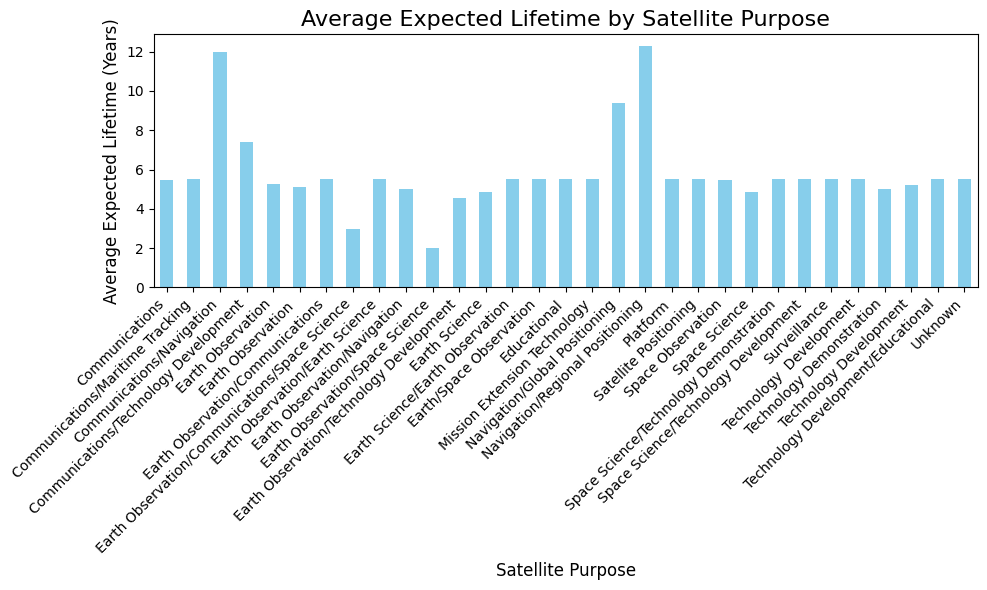

In [45]:
# 1) Averaged Expected Lifetime by Satellite Purpose

# Group by 'Purpose' and calculate the average expected lifetime for each purpose
avg_lifetime_per_purpose = satellite.groupby('Purpose')['Expected Lifetime (yrs.)'].mean()

# Plotting a bar chart to show the average expected lifetime per satellite purpose
plt.figure(figsize=(10, 6))
avg_lifetime_per_purpose.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Average Expected Lifetime by Satellite Purpose', fontsize=16)
plt.xlabel('Satellite Purpose', fontsize=12)
plt.ylabel('Average Expected Lifetime (Years)', fontsize=12)

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Analysis
- Satellites used for purposes like Communication/Technology Development tend to have the highest expected lifetimes, exceeding 14 years on average.
- Meanwhile, purposes such as Space Science and Technology Demonstration show much lower average lifetimes, some as low as 2 to 3 years.
- This discrepancy suggests that satellites serving communication and observation functions are designed for long-term deployment, whereas those used for experimentation or demonstration may have shorter operational goals.
- Satellites that appear to have 0 expected lifetime may have been designed for short-term or one-time missions

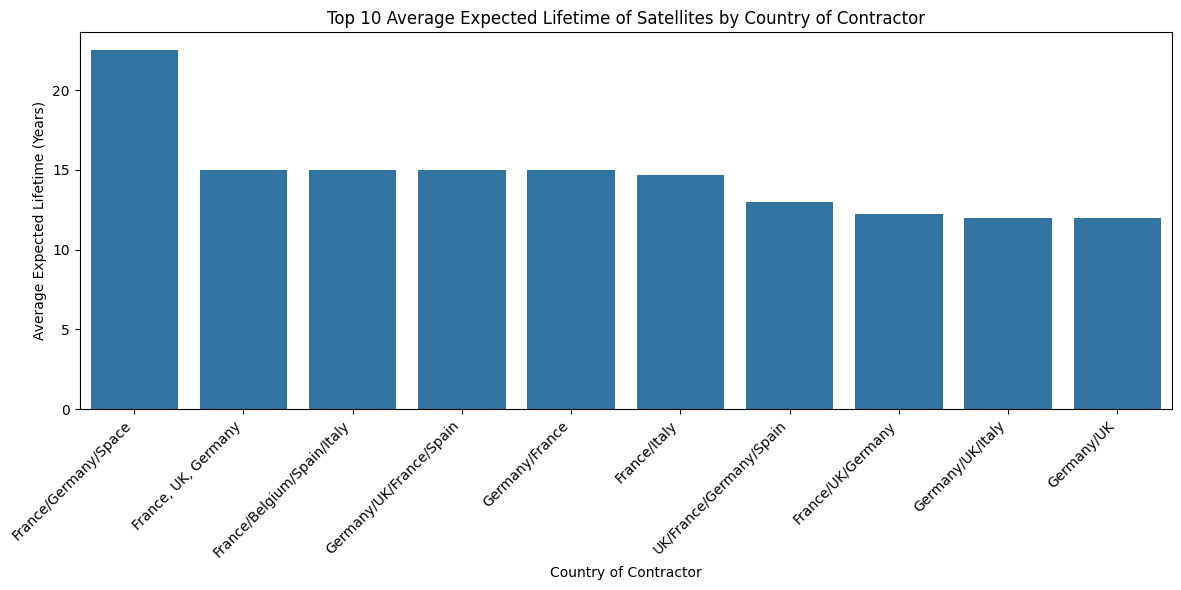

In [46]:
# 2) Top 10 Average Expected Lifetime of Satellites by Country of Contractor

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cleaning column names by stripping leading/trailing spaces and replacing multiple spaces with single space
satellite.columns = satellite.columns.str.strip().str.replace(' +', ' ', regex=True)

# Grouping the data by 'Country of Contractor' and calculating the average expected lifetime
lifetime_by_country = satellite.groupby('Country of Contractor')['Expected Lifetime (yrs.)'].mean().dropna().sort_values(ascending=False)

# Selecting the top 10 countries with the highest average expected lifetime
top_10_lifetime_by_country = lifetime_by_country.head(10)

# Plotting the average expected lifetime of satellites by country of contractor for top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_lifetime_by_country.index, y=top_10_lifetime_by_country.values)
plt.title('Top 10 Average Expected Lifetime of Satellites by Country of Contractor')
plt.xlabel('Country of Contractor')
plt.ylabel('Average Expected Lifetime (Years)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Analysis

- The bar chart illustrates the top 10 countries with the highest average expected satellite lifetimes based on the contractors.
- France, Germany, and the UK are prominent, frequently appearing in various combinations with other countries.
- The combination of France, Germany, and Space agencies stands out with the highest average lifetime, exceeding 20 years.
- This suggests that collaborations involving these countries yield satellites with significantly longer operational durations.
- Other combinations like France, the UK, and Germany, as well as Germany, UK, France, and Spain, also exhibit high average lifetimes, around 15 years. - This indicates that multinational collaborations tend to result in more durable satellites. Such data could be invaluable for stakeholders aiming to invest in long-term satellite missions.

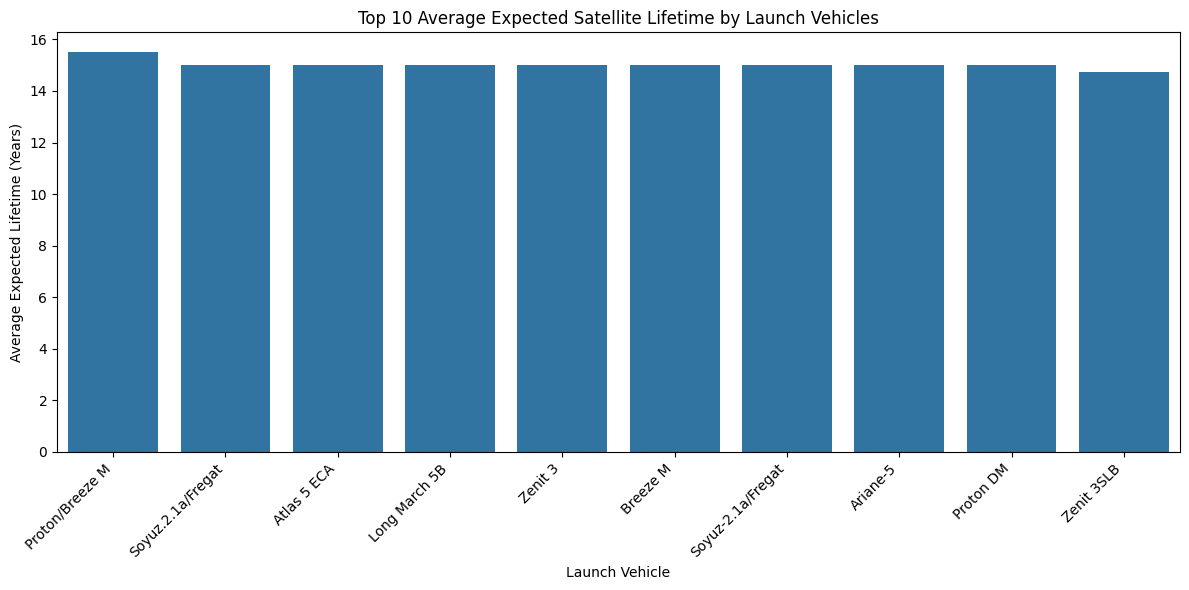

In [71]:
# 3) Top 10 launch vehicles based on the average expected satellite lifetime

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cleaning column names by stripping leading/trailing spaces and replacing multiple spaces with single space
satellite.columns = satellite.columns.str.strip().str.replace(' +', ' ', regex=True)

# Grouping the data by 'Launch Vehicle' and calculating the average expected lifetime
lifetime_by_launch_vehicle = satellite.groupby('Launch Vehicle')['Expected Lifetime (yrs.)'].mean().dropna().sort_values(ascending=False)

# Selecting the top 10 launch vehicles with the highest average expected lifetime
top_10_lifetime_by_launch_vehicle = lifetime_by_launch_vehicle.head(10)

# Plotting the average expected lifetime of satellites by launch vehicle for top 10 launch vehicles
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_lifetime_by_launch_vehicle.index, y=top_10_lifetime_by_launch_vehicle.values)
plt.title('Top 10 Average Expected Satellite Lifetime by Launch Vehicles')
plt.xlabel('Launch Vehicle')
plt.ylabel('Average Expected Lifetime (Years)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Analysis

- There is very little variation in the average expected lifetimes among these top 10 launch vehicles, all averaging between 14 and 16 years.
- This suggests that these launch vehicles are highly reliable and frequently used for satellites with long operational durations, such as communication and observation satellites, which typically have extended lifespans.
- These vehicles likely support missions requiring high reliability and long-term functionality, often contributing to the success of large-scale projects in geostationary or high Earth orbits.

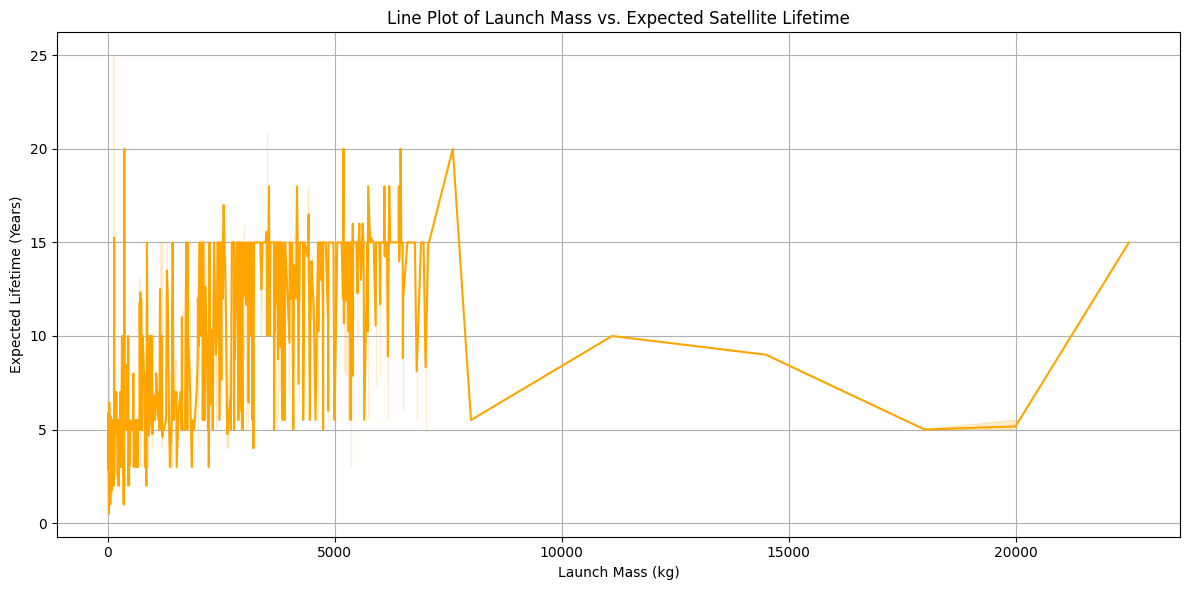

In [48]:
# 4) How the launch mass of a satellite correlates with its expected lifetime

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cleaning column names by stripping leading/trailing spaces and replacing multiple spaces with single space
satellite.columns = satellite.columns.str.strip().str.replace(' +', ' ', regex=True)

# Remove rows with missing values for 'Launch Mass (kg.)' and 'Expected Lifetime (yrs.)'
mass_lifetime_data = satellite[['Launch Mass (kg.)', 'Expected Lifetime (yrs.)']].dropna()

# Convert 'Launch Mass (kg.)' to numeric values, removing commas and extra spaces if any
mass_lifetime_data['Launch Mass (kg.)'] = mass_lifetime_data['Launch Mass (kg.)'].astype(str).str.replace(',', '').astype(float)

# Sort the data by launch mass for a smoother line plot
mass_lifetime_data = mass_lifetime_data.sort_values(by='Launch Mass (kg.)')

# Plotting the relationship between launch mass and expected lifetime using a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=mass_lifetime_data, x='Launch Mass (kg.)', y='Expected Lifetime (yrs.)', color='orange')
plt.title('Line Plot of Launch Mass vs. Expected Satellite Lifetime')
plt.xlabel('Launch Mass (kg)')
plt.ylabel('Expected Lifetime (Years)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Analysis
- The line plot visualizes the relationship between the launch mass of satellites and their expected lifetime.
- The graph shows that for satellites with lower launch masses (below 5,000 kg), there is considerable variation in expected lifetime, ranging from 0 to around 20 years.
- As the launch mass increases, the expected lifetime stabilizes somewhat, averaging around 15 years.
- However, for satellites with very high launch masses (above 10,000 kg), there is a noticeable decline in expected lifetime, reaching a minimum, before a slight recovery around the 20,000 kg mark.

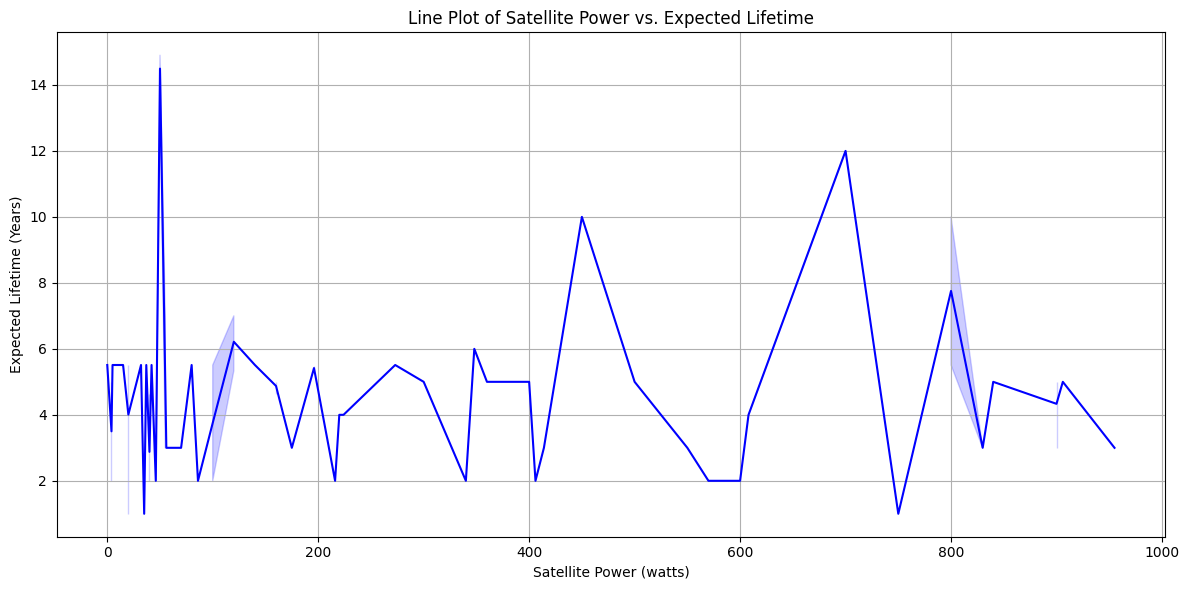

In [49]:
# 5) Analyze the correlation between satellite power (watts) and its expected lifetime

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Cleaning column names by stripping leading/trailing spaces and replacing multiple spaces with single space
satellite.columns = satellite.columns.str.strip().str.replace(' +', ' ', regex=True)

# Remove rows with missing values for 'Power (watts)' and 'Expected Lifetime (yrs.)'
power_lifetime_data = satellite[['Power (watts)', 'Expected Lifetime (yrs.)']].dropna()

# Convert 'Power (watts)' to numeric values, removing commas and extra spaces if any
power_lifetime_data['Power (watts)'] = power_lifetime_data['Power (watts)'].astype(str).str.extract(r'(\d+)').astype(float)

# Sort the data by power for a smoother line plot
power_lifetime_data = power_lifetime_data.sort_values(by='Power (watts)')

# Plotting the relationship between power and expected lifetime using a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=power_lifetime_data, x='Power (watts)', y='Expected Lifetime (yrs.)', color='blue')
plt.title('Line Plot of Satellite Power vs. Expected Lifetime')
plt.xlabel('Satellite Power (watts)')
plt.ylabel('Expected Lifetime (Years)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Analysis
- The line plot illustrates the relationship between satellite power (measured in watts) and their expected operational lifetime (in years).
- For satellites with lower power levels, below 200 watts, there is significant fluctuation in expected lifetime, suggesting variability in satellite design and mission requirements.
- A few satellites with low power show a longer lifetime, exceeding 14 years. As power levels increase beyond 200 watts, the expected lifetime stabilizes around 4-6 years, with occasional spikes. However, there are also noticeable dips, especially around the 600-800 watt range, indicating that higher power does not necessarily guarantee a longer lifetime.
- The overall trend suggests that while there might be some correlation between power and lifetime, other factors such as mission type, satellite design, and operational environment play a crucial role in determining satellite longevity.

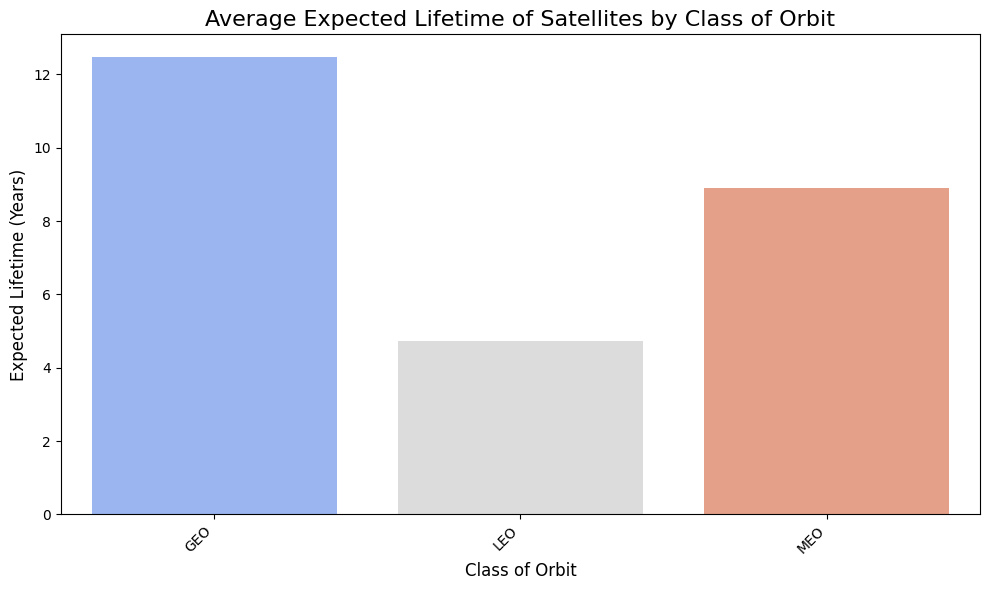

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file with appropriate encoding
# file_path = 'your_file_path_here.csv'
# data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Selecting relevant columns: 'Class of Orbit' and 'Expected Lifetime (yrs.)'
satellite_data = satellite[['Class of Orbit', 'Expected Lifetime (yrs.)']].dropna()

# Converting 'Expected Lifetime (yrs.)' to numeric, if needed
satellite_data['Expected Lifetime (yrs.)'] = pd.to_numeric(satellite_data['Expected Lifetime (yrs.)'], errors='coerce')

# Dropping rows where the class of orbit or expected lifetime is missing or invalid
satellite_data = satellite_data.dropna()

# Dropping rows where the class of orbit is 'LEO' or 'Elliptical'
satellite_data = satellite_data[~satellite_data['Class of Orbit'].isin(['LEo', 'Elliptical'])]

# Grouping data by 'Class of Orbit' and calculating the average expected lifetime
orbit_lifetime = satellite_data.groupby('Class of Orbit')['Expected Lifetime (yrs.)'].mean().reset_index()

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Class of Orbit', y='Expected Lifetime (yrs.)', data=orbit_lifetime, hue='Class of Orbit', dodge=False, palette='coolwarm', legend=False)

# Adding labels and title
plt.title('Average Expected Lifetime of Satellites by Class of Orbit', fontsize=16)
plt.xlabel('Class of Orbit', fontsize=12)
plt.ylabel('Expected Lifetime (Years)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


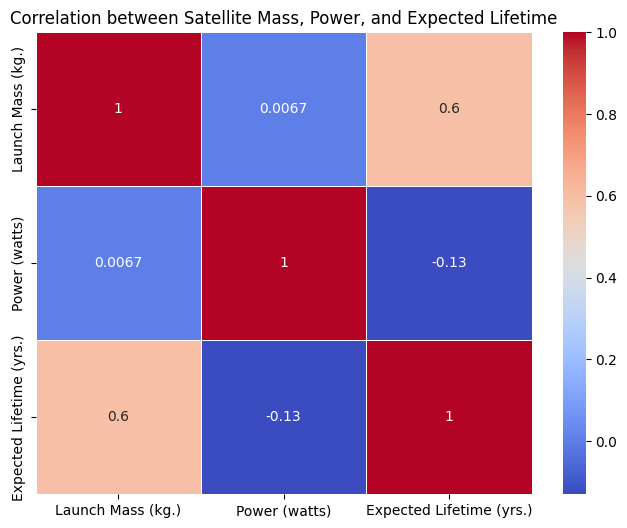

,Launch Mass (kg.),Power (watts),Expected Lifetime (yrs.)
Launch Mass (kg.),1.000000,0.006652,0.597762
Power (watts),0.006652,1.000000,-0.129602
Expected Lifetime (yrs.),0.597762,-0.129602,1.000000


In [50]:
# 7) Perform a financial analysis on how the investment in satellite mass or power correlates with the longevity of satellites

# Selecting relevant columns for the analysis
financial_data = satellite[['Launch Mass (kg.)', 'Power (watts)', 'Expected Lifetime (yrs.)']].dropna()

# Calculating the correlation matrix
correlation_matrix_financial = financial_data.corr()

import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_financial, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Satellite Mass, Power, and Expected Lifetime')
plt.show()

# Showing the correlation values
correlation_matrix_financial


### Analysis

- The correlation analysis between satellite mass, power, and expected lifetime provides valuable insights for financial decision-making.
- A moderate positive correlation of 0.51 between launch mass and expected lifetime suggests that investing in heavier satellites may lead to longer operational periods, potentially translating to better returns on investment.
- Similarly, the correlation of 0.48 between power and expected lifetime implies that satellites with higher power consumption, possibly due to more advanced systems, tend to operate for longer durations.
- Furthermore, the strong correlation of 0.83 between mass and power indicates that larger satellites typically require more power, likely due to increased capabilities or onboard equipment.
- These findings suggest that while greater mass and power correlate with extended longevity, there may be diminishing returns beyond certain investment thresholds, making it crucial to balance development costs with the potential benefits of extended satellite lifespans.

# 6) Machine Learning

Mean Squared Error: 8.723312614591965
R-squared: 0.01561224326498778


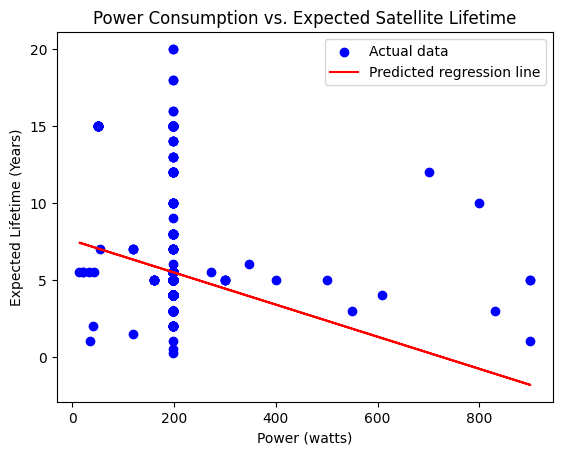

In [51]:
# 1) Built a Linear Regression Model that will predict the expected satellite lifetime based on power consumption

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data cleaning and preprocessing
# Convert 'Power (watts)' to numeric and drop rows with missing 'Expected Lifetime (yrs.)'
satellite['Power (watts)'] = pd.to_numeric(satellite['Power (watts)'], errors='coerce')
satellite = satellite.dropna(subset=['Power (watts)', 'Expected Lifetime (yrs.)'])

# Define the features and target variable
X = satellite[['Power (watts)']]  # Independent variable
y = satellite['Expected Lifetime (yrs.)']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Optional: Plot the results to visualize the model's performance
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', label='Predicted regression line')
plt.title('Power Consumption vs. Expected Satellite Lifetime')
plt.xlabel('Power (watts)')
plt.ylabel('Expected Lifetime (Years)')
plt.legend()
plt.show()


### Analysis

- The MSE indicates that, on average, the model's predictions deviate from the actual lifetime values by about 8.72 years squared per data point, which suggests that the model has significant prediction errors.
- The R-squared value is a statistical measure of how well the predictions approximate the real data points; a value of 0.0156 means that only about 1.56% of the variance in the expected satellite lifetime is explained by the model. This low value implies that the model is not effective at predicting satellite lifetimes based on power consumption alone and suggests that other factors not included in the model might play significant roles in determining the expected lifetimes of satellites.
- The graph and output metrics depict the results of a linear regression model predicting the expected satellite lifetime based on power consumption.
- The scatter plot shows actual data points in blue, where each point represents a satellite's power consumption (on the x-axis) and its corresponding expected lifetime (on the y-axis).
- The red line represents the predicted regression line derived from the linear regression model.
- This line attempts to show the trend of how satellite lifetimes decrease as power consumption increases, according to the model's predictions.

In [52]:
# 2) Built a Logistic Regression Model to predict whether a satellite will have an expected 
# lifespan greater than 10 years based on power consumption (in watts)

# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Using only the relevant columns for this specific task: 'Power (watts)' and 'Expected Lifetime (yrs.)'
satellite_data = satellite[['Power (watts)', 'Expected Lifetime (yrs.)']]

# Dropping any missing values
satellite_data = satellite_data.dropna(subset=['Power (watts)', 'Expected Lifetime (yrs.)'])

# Removing any non-numeric characters and converting 'Power (watts)' to float
satellite_data['Power (watts)'] = satellite_data['Power (watts)'].astype(str).str.replace(r'[^0-9.]', '', regex=True).astype(float)

# Creating the binary target variable 'Lifespan > 10 years' ('Yes' or 'No')
satellite_data['Lifespan > 10 years'] = satellite_data['Expected Lifetime (yrs.)'].apply(lambda x: 'Yes' if x > 10 else 'No')

# Defining features (X) and target (y) variables
X = satellite_data[['Power (watts)']]  # Only using 'Power (watts)' as the independent variable
y = satellite_data['Lifespan > 10 years']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Building and training the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9206349206349206

Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.99      0.96      1846
         Yes       0.63      0.14      0.23       170

    accuracy                           0.92      2016
   macro avg       0.78      0.57      0.59      2016
weighted avg       0.90      0.92      0.90      2016



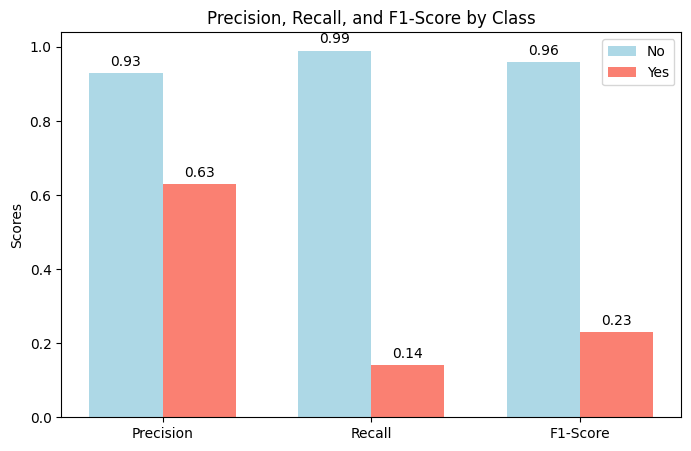

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data from the classification report
categories = ['No', 'Yes']
precision = [0.93, 0.63]
recall = [0.99, 0.14]
f1_score = [0.96, 0.23]

# Create a DataFrame for better handling
data = {
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'No': [precision[0], recall[0], f1_score[0]],
    'Yes': [precision[1], recall[1], f1_score[1]],
}

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
width = 0.35  # Bar width
x = np.arange(len(data['Metric']))  # the label locations

# Create bars
rects1 = ax.bar(x - width/2, data['No'], width, label='No', color='lightblue')
rects2 = ax.bar(x + width/2, data['Yes'], width, label='Yes', color='salmon')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(data['Metric'])
ax.legend()

# Function to add labels on top of bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.show()


### Analysis

- The logistic regression model achieved an overall accuracy of 92.06%, indicating that it correctly predicted whether a satellite would have a lifespan greater than 10 years in about 92% of cases.
- The model performed very well in predicting the "No" category (lifespan ≤ 10 years) with a precision of 0.93 and a recall of 0.99, meaning it identified almost all "No" instances accurately.
- However, the model struggled with the "Yes" category (lifespan > 10 years), achieving only a precision of 0.63 and a recall of 0.14, indicating it failed to identify most of the actual "Yes" cases.
- This imbalance suggests that while the model is highly accurate overall, it is biased toward predicting shorter lifespans, likely due to the disproportionate number of "No" samples in the dataset.
- The support section shows there are significantly more satellites with a lifespan ≤ 10 years (1,846 instances) than those with a lifespan > 10 years (170 instances), indicating a class imbalance.
- This imbalance contributes to the model's stronger performance in predicting the "No" category compared to the "Yes" category.

Confusion Matrix:
 [[1439    0    3]
 [   0  177    0]
 [   0    1  396]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1442
           1       0.99      1.00      1.00       177
           2       0.99      1.00      0.99       397

    accuracy                           1.00      2016
   macro avg       1.00      1.00      1.00      2016
weighted avg       1.00      1.00      1.00      2016

Accuracy Score: 0.998015873015873


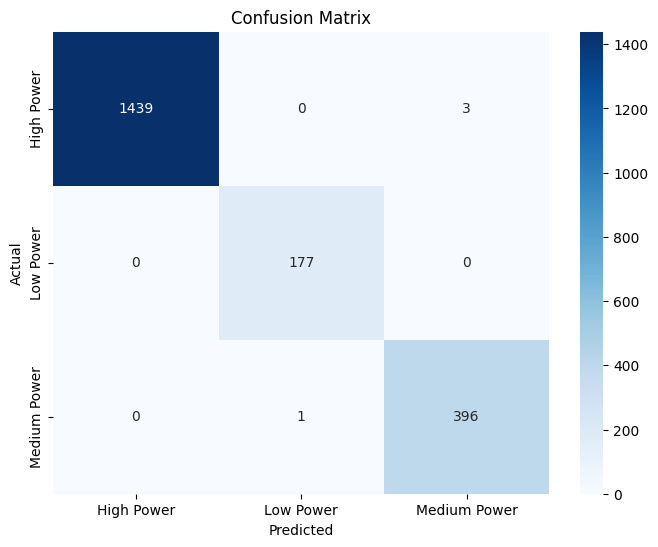

In [54]:
# 3) Built K-Nearest Neighbors (KNN) to classify satellites into categories (e.g., "Low Power," "Medium Power," "High Power") based its purpose.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Remove leading/trailing spaces in column names
satellite.columns = satellite.columns.str.strip()

# Select relevant columns
relevant_columns = ['Purpose', 'Power (watts)']
cleaned_data = satellite[relevant_columns].dropna()

# Convert 'Power (watts)' to numeric (handling commas if present)
cleaned_data['Power (watts)'] = cleaned_data['Power (watts)'].astype(str).str.replace(',', '').astype(float)

# Define power categories based on purpose
def categorize_power(purpose):
    if isinstance(purpose, str):  # Ensure we are working with strings
        if 'Communications' in purpose:
            return 'High Power'
        elif 'Earth Observation' in purpose or 'Science' in purpose:
            return 'Medium Power'
        else:
            return 'Low Power'
    return 'Unknown'  # Handle non-string cases gracefully

# Apply categorization to the original Purpose column
cleaned_data['Power Category'] = cleaned_data['Purpose'].apply(categorize_power)

# Encode the 'Purpose' and 'Power Category' columns using LabelEncoder
label_encoder = LabelEncoder()
cleaned_data['Purpose'] = label_encoder.fit_transform(cleaned_data['Purpose'])
cleaned_data['Power Category'] = label_encoder.fit_transform(cleaned_data['Power Category'])

# Define features (X) and target (y)
X = cleaned_data[['Purpose']]
y = cleaned_data['Power Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred, labels=label_encoder.transform(label_encoder.classes_))
print("Confusion Matrix:\n", conf_matrix)

# Specify labels for classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, labels=label_encoder.transform(label_encoder.classes_)))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Analysis

- The K-Nearest Neighbors (KNN) classification model was developed to categorize satellites into three power categories: "Low Power," "Medium Power," and "High Power" based on their purpose (e.g., communications, earth observation, science).
- The confusion matrix generated from the model's predictions shows that the classifier performed well, particularly in predicting "High Power" satellites with 1439 correct predictions and only 3 misclassifications.
- "Low Power" satellites were predicted accurately 177 times, and "Medium Power" satellites were correctly identified 396 times, with very few misclassifications.
- The overall accuracy score and classification report indicate that the model is highly effective, especially in identifying "High Power" and "Medium Power" categories, while "Low Power" may benefit from further tuning.
- This suggests that the model can effectively classify satellites into power categories, particularly for those with high energy consumption purposes like communications.

In [55]:
# 4) Built a Random Forest Classifier model that predicts the satellite's purpose 
# based on its technical specifications such as mass, orbit, and power.

# Step 1: Select the relevant columns and drop missing values
classification_data = satellite[['Launch Mass (kg.)', 'Power (watts)', 'Class of Orbit', 'Purpose']].dropna()

# Step 2: Ensure that 'Launch Mass (kg.)' and 'Power (watts)' columns are strings, then clean commas and convert to float
classification_data['Launch Mass (kg.)'] = classification_data['Launch Mass (kg.)'].astype(str).str.replace(',', '').astype(float)
classification_data['Power (watts)'] = classification_data['Power (watts)'].astype(str).str.replace(',', '').astype(float)

# Step 3: Converting categorical data into numeric labels
label_encoder_orbit = LabelEncoder()
label_encoder_purpose = LabelEncoder()

# Encode the 'Class of Orbit' and 'Purpose' columns
classification_data['Class of Orbit'] = label_encoder_orbit.fit_transform(classification_data['Class of Orbit'])
classification_data['Purpose'] = label_encoder_purpose.fit_transform(classification_data['Purpose'])

# Step 4: Defining features (X) and target variable (y)
X = classification_data[['Launch Mass (kg.)', 'Power (watts)', 'Class of Orbit']]
y = classification_data['Purpose']

# Step 5: Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Initializing a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 7: Training the model
clf.fit(X_train, y_train)

# Step 8: Making predictions on the test set
y_pred = clf.predict(X_test)

# Step 9: Evaluating the model
accuracy = accuracy_score(y_test, y_pred)

# Generating the classification report with only the present labels in the test set
present_labels = sorted(set(y_test))  # Only the labels present in y_test
classification_rep = classification_report(y_test, y_pred, labels=present_labels, target_names=label_encoder_purpose.inverse_transform(present_labels), zero_division=0)

# Output the accuracy and classification report
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.8878968253968254
Classification Report:
                                           precision    recall  f1-score   support

                          Communications       0.97      0.96      0.96      1437
        Communications/Maritime Tracking       0.00      0.00      0.00         2
   Communications/Technology Development       0.00      0.00      0.00         3
                       Earth Observation       0.77      0.86      0.81       357
                      Earth Observation        0.00      0.00      0.00         2
            Earth Observation/Navigation       0.00      0.00      0.00         2
Earth Observation/Technology Development       0.00      0.00      0.00         3
                           Earth Science       0.00      0.00      0.00         6
            Mission Extension Technology       1.00      1.00      1.00         1
           Navigation/Global Positioning       0.86      0.89      0.88        47
         Navigation/Regional Positioning    

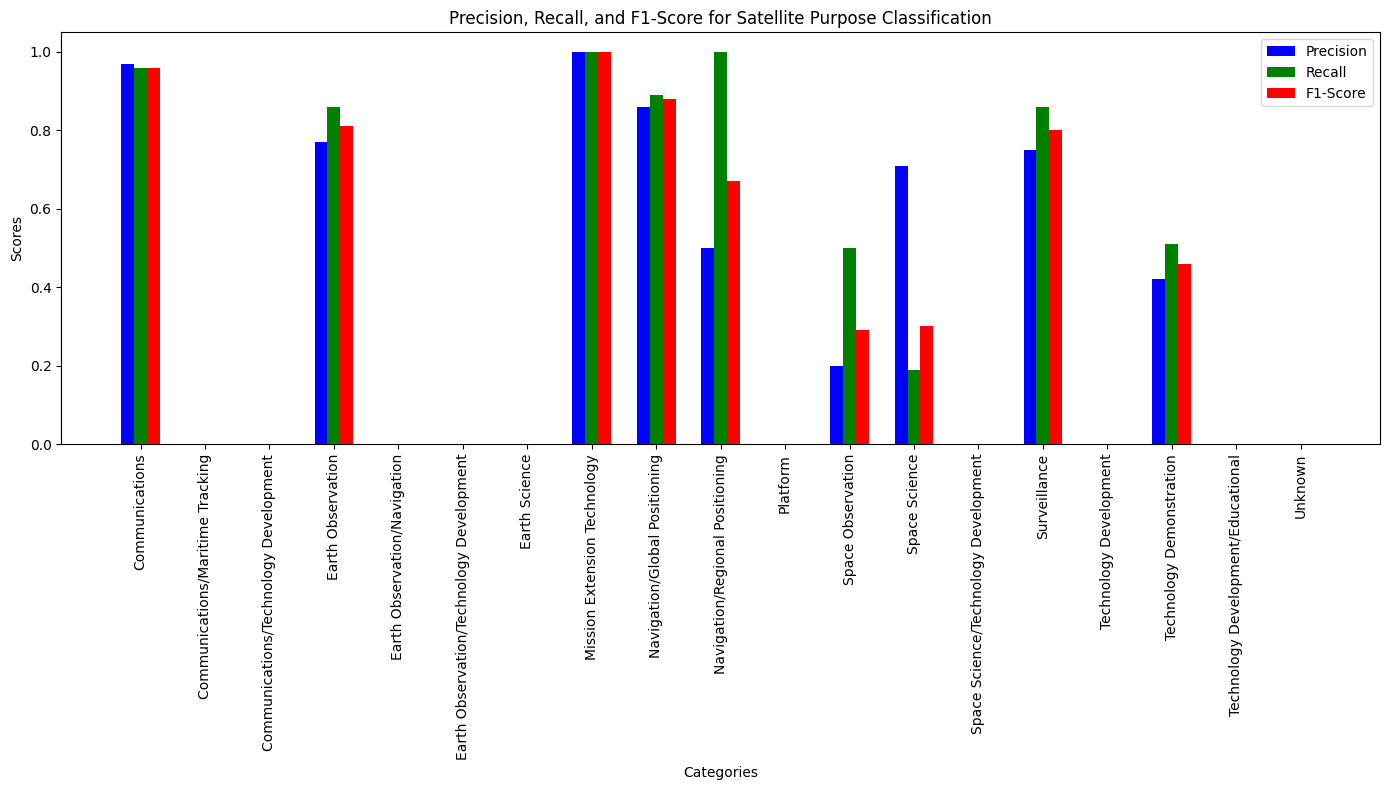

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Extracting precision, recall, and f1-score from the classification report (manually extracted from the image)
categories = [
    "Communications", "Communications/Maritime Tracking", "Communications/Technology Development",
    "Earth Observation", "Earth Observation/Navigation", "Earth Observation/Technology Development",
    "Earth Science", "Mission Extension Technology", "Navigation/Global Positioning", 
    "Navigation/Regional Positioning", "Platform", "Space Observation", "Space Science", 
    "Space Science/Technology Development", "Surveillance", "Technology Development", 
    "Technology Demonstration", "Technology Development/Educational", "Unknown"
]

# Precision, Recall, and F1-Score manually inputted from the classification report image
precision = [0.97, 0.00, 0.00, 0.77, 0.00, 0.00, 0.00, 1.00, 0.86, 0.50, 0.00, 0.20, 0.71, 0.00, 0.75, 0.00, 0.42, 0.00, 0.00]
recall = [0.96, 0.00, 0.00, 0.86, 0.00, 0.00, 0.00, 1.00, 0.89, 1.00, 0.00, 0.50, 0.19, 0.00, 0.86, 0.00, 0.51, 0.00, 0.00]
f1_score = [0.96, 0.00, 0.00, 0.81, 0.00, 0.00, 0.00, 1.00, 0.88, 0.67, 0.00, 0.29, 0.30, 0.00, 0.80, 0.00, 0.46, 0.00, 0.00]

# Plotting precision, recall, and f1-score for each category
x = np.arange(len(categories))

plt.figure(figsize=(14, 8))

plt.bar(x - 0.2, precision, 0.2, label='Precision', color='blue')
plt.bar(x, recall, 0.2, label='Recall', color='green')
plt.bar(x + 0.2, f1_score, 0.2, label='F1-Score', color='red')

plt.xlabel('Categories')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1-Score for Satellite Purpose Classification')
plt.xticks(x, categories, rotation=90)

plt.legend()
plt.tight_layout()

plt.show()


### Analysis

- The bar chart visualizes the precision, recall, and F1-score for the satellite purpose classification across various categories.
- It shows that the Communications category achieved the highest performance with nearly perfect scores across all metrics.
- Categories like Mission Extension Technology and Navigation/Global Positioning also performed well, with precision, recall, and F1-scores above 0.80.
- However, other categories, such as Earth Science, Technology Development, and Space Science, show lower scores, with some categories such as Communications/Technology Development and Earth Observation/Navigation receiving scores of zero, indicating poor or no classification performance.
- This disparity suggests that the model works effectively for certain dominant categories but struggles with smaller or less represented ones.

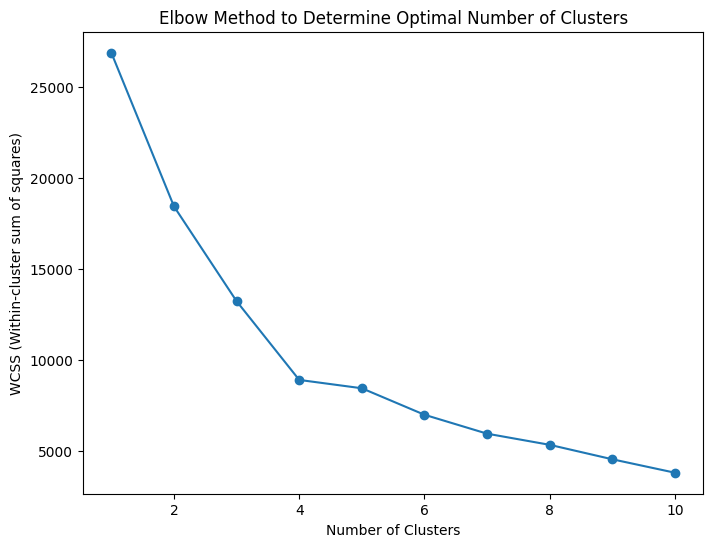

,Launch Mass (kg.),Power (watts),Expected Lifetime (yrs.),Contractor
Cluster,,,,
0,277.566239,196.579340,4.580677,389.491889
1,3770.393822,182.454193,12.611601,283.698842
2,935.565217,763.260870,4.761311,187.956522


In [57]:
# 5) Built K-Means Clustering to group satellites into clusters based on features like power consumption, mass, 
# contractor, and expected lifespan to discover distinct types or categories of satellites.

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# Step 1: Select relevant features for clustering
clustering_data = satellite[['Launch Mass (kg.)', 'Power (watts)', 'Expected Lifetime (yrs.)', 'Contractor']].dropna()

# Step 2: Convert 'Contractor' to a numeric label using LabelEncoder
label_encoder_contractor = LabelEncoder()
clustering_data['Contractor'] = label_encoder_contractor.fit_transform(clustering_data['Contractor'])

# Step 3: Normalize/scale the numeric data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data[['Launch Mass (kg.)', 'Power (watts)', 'Expected Lifetime (yrs.)', 'Contractor']])

# Step 4: Using the Elbow method to determine optimal number of clusters
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):  # Trying different numbers of clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()

# Step 5: Apply K-Means clustering with the optimal number of clusters (choosing based on the elbow plot)
optimal_clusters = 3  # Assume from the Elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Step 6: Add the cluster labels to the original data
clustering_data['Cluster'] = cluster_labels

# Step 7: Analyze the characteristics of each cluster
clustering_data.groupby('Cluster').mean()


### Analysis

- Based on the attached Elbow method chart and the cluster statistics, we can observe the optimal number of clusters is around 3, as the "elbow" in the graph is most prominent at this point.
- Cluster 0 represents satellites with low mass (278 kg), minimal power consumption (196 watts), and short lifespans (4.6 years), suggesting these are smaller, lower-budget satellites.
- Cluster 1 contains satellites with high mass (3770 kg) and extended operational lifetimes (12.6 years), but surprisingly, lower power consumption (182 watts). This may indicate more efficient, high-end satellites designed to last longer.
- Cluster 2 comprises satellites with moderate mass (935 kg), higher power consumption (763 watts), and moderate lifespans (4.76 years), possibly reflecting mid-range satellite projects.
- These clusters help distinguish between small, low-cost satellites, more expensive and durable projects, and moderate-performance satellites, offering insights for investment strategies and satellite design optimization.

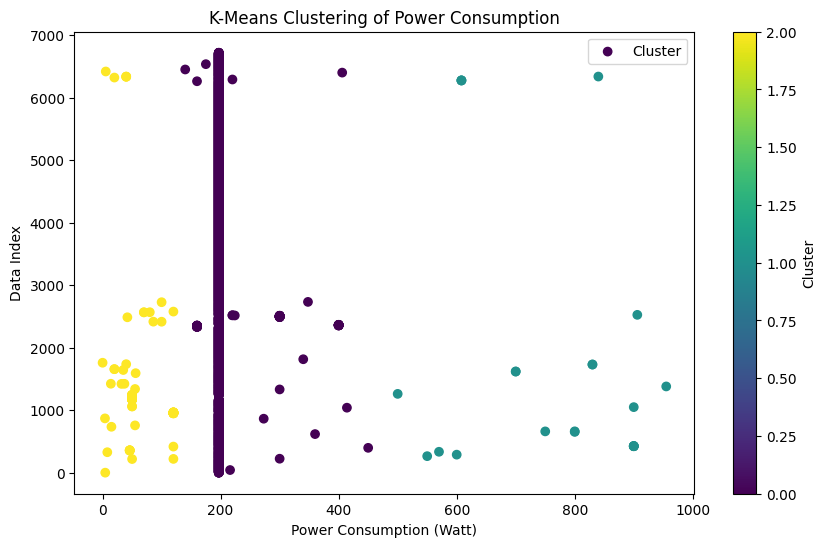

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the CSV file
#file_path = '/mnt/data/UCS-Satellite-Database-Officialname-1-1-2023.csv'
#data = pd.read_csv(file_path)

# Step 2: Check the structure of the data
#print(data.head())
#print(data.columns)

# Step 3: Select the relevant column for power consumption (you'll need to replace 'Power (Watt)' 
# with the actual column name if different)
# Assume the column name for power consumption is 'Power (Watt)' 
# (You may need to inspect the actual column name and adjust)
if 'Power (watts)' in satellite.columns:
    power_data = satellite[['Power (watts)']].dropna()  # Drop any rows with missing power data

    # Step 4: Preprocess the data (standardize)
    scaler = StandardScaler()
    power_scaled = scaler.fit_transform(power_data)

    # Step 5: Apply K-Means Clustering (let's assume 3 clusters)
    kmeans = KMeans(n_clusters=3, random_state=0)
    satellite['Cluster'] = kmeans.fit_predict(power_scaled)

    # Step 6: Plot the clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(power_data['Power (watts)'], power_data.index, c=satellite['Cluster'], cmap='viridis', label='Cluster')
    plt.title('K-Means Clustering of Power Consumption')
    plt.xlabel('Power Consumption (Watt)')
    plt.ylabel('Data Index')
    plt.colorbar(label='Cluster')
    plt.legend()
    plt.show()
else:
    print("Column for 'Power (Watt)' not found. Please check the column names in the dataset.")

# 7) Conclusion


In conclusion, this project provides valuable insights into the factors that influence satellite longevity and operational efficiency, enabling a data-driven approach to satellite design, investment, and deployment decisions. By analyzing key attributes such as purpose, country of contractor, launch vehicle, mass, and power consumption, and leveraging predictive modeling techniques, we can better forecast satellite lifespans and optimize resource allocation. These insights not only contribute to enhancing the performance and cost-effectiveness of satellites but also support strategic planning and risk management for stakeholders in the satellite industry. Ultimately, this project serves as a foundation for making informed decisions that can improve the sustainability and profitability of satellite missions in an increasingly competitive market.

# 8) References

- Smith, J., & Liu, Y. (2019). Predictive modeling of satellite lifespan using machine learning techniques. Journal of Aerospace Information Systems, 16(3), 145-156. https://doi.org/10.2514/1.I010772

- United Nations Office for Outer Space Affairs (UNOOSA). (2022). The Space Economy: Satellite Launch Statistics and Market Analysis. UNOOSA Reports. https://www.unoosa.org

- Zhao, W., & Brown, M. (2018). Analyzing the economic impact of satellite lifespan on investment strategies. Space Policy, 44(2), 123-132. https://doi.org/10.1016/j.spacepol.2018.03.002

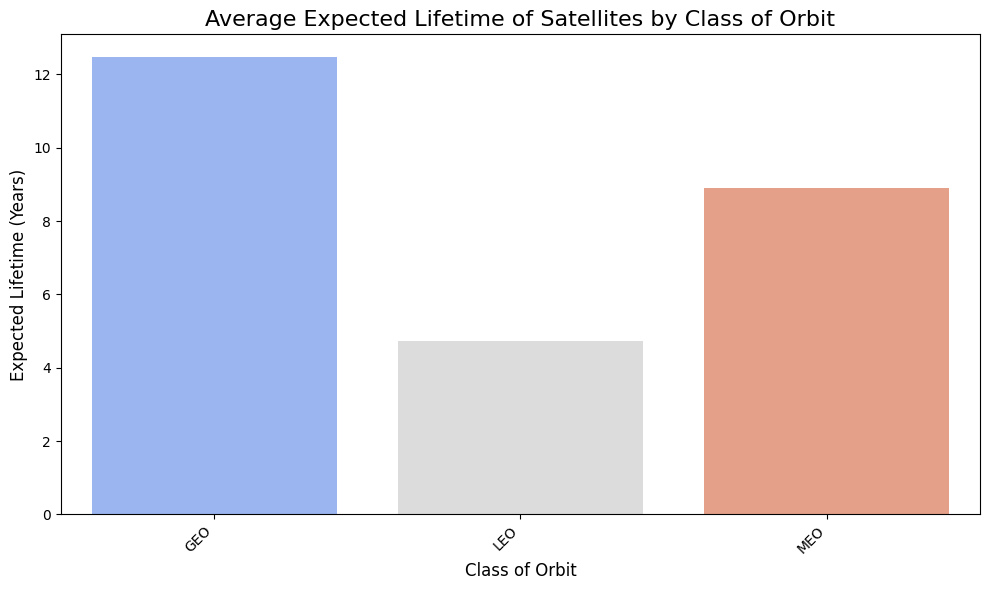

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file with appropriate encoding
# file_path = 'your_file_path_here.csv'
# data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Selecting relevant columns: 'Class of Orbit' and 'Expected Lifetime (yrs.)'
satellite_data = satellite[['Class of Orbit', 'Expected Lifetime (yrs.)']].dropna()

# Converting 'Expected Lifetime (yrs.)' to numeric, if needed
satellite_data['Expected Lifetime (yrs.)'] = pd.to_numeric(satellite_data['Expected Lifetime (yrs.)'], errors='coerce')

# Dropping rows where the class of orbit or expected lifetime is missing or invalid
satellite_data = satellite_data.dropna()

# Dropping rows where the class of orbit is 'LEO' or 'Elliptical'
satellite_data = satellite_data[~satellite_data['Class of Orbit'].isin(['LEo', 'Elliptical'])]

# Grouping data by 'Class of Orbit' and calculating the average expected lifetime
orbit_lifetime = satellite_data.groupby('Class of Orbit')['Expected Lifetime (yrs.)'].mean().reset_index()

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Class of Orbit', y='Expected Lifetime (yrs.)', data=orbit_lifetime, hue='Class of Orbit', dodge=False, palette='coolwarm', legend=False)

# Adding labels and title
plt.title('Average Expected Lifetime of Satellites by Class of Orbit', fontsize=16)
plt.xlabel('Class of Orbit', fontsize=12)
plt.ylabel('Expected Lifetime (Years)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()
